In [1]:
import numpy as np
import matplotlib.pyplot as plt

from SubpopulationsLib.DataProcessing import create_SIR_data
from SubpopulationsLib.Subpopulations import find_theta_sa
from SubpopulationsLib.Subpopulations import mixture_exponentials, mixture_SIR

# Data loading
Load and visualize the number of people infected in Canada during a selected timeframe

In [2]:
# Determine the dates to use
start_date = '7/30/20'
end_date = '7/30/21'

# Set the path to the datasets
file_path = './Data/'
lookup_table_path = './Data/UID_ISO_FIPS_LookUp_Table.csv'

# Set the name of the country
country_name = 'Canada'

# Transform the data into SIR format
S, I, R = create_SIR_data(country_name, file_path, lookup_table_path, start_date, end_date)

indexes_weekly = np.arange(0,S.shape[0],7)

S = S[indexes_weekly]
I = I[indexes_weekly]
R = R[indexes_weekly]

data = I[1:]

### Visualize the data

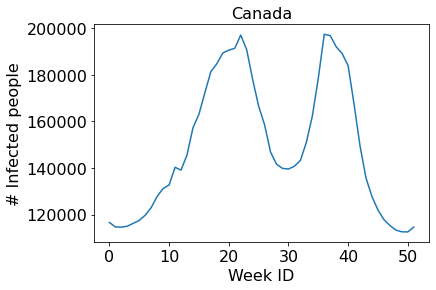

In [3]:
plt.figure()
plt.plot(data)
plt.xlabel("Week ID", fontsize=16)
plt.ylabel("# Infected people", fontsize=16)
plt.title(country_name, fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Set the parameters for the mixture of signals approach
We use simulated annealing to find the parameters of the different models. Simulated annealing requires a pair (lower-bound, upper-bound) for every parameter to be optimized. We provide a function to fund such parameters

**find_theta_sa (bounds, data, mixture)**

*Inputs*

- bounds : List of pairs (lower-bound, upper-bound) for each parameter to find. For the mixture of Gaussians the order of the bounds is [bounds_mu, bounds_sigma, bounds_coef], for the mixture of SIR the order is [bound_S, bound_beta, bound_gamma, bound_coef, bound_k]
- data : A numpy array of size (num_timepoint, ) that contains the data to be fitted
- mixture : The function mixture_exponentials or mixture_SIR

*Output*
- params : Optimized parameters

In [5]:
num_mixtures = 2

# ------------------------
# For the Gaussian model
# ------------------------
bounds_mu = (0,50)
bounds_sigma = (1,6)
bounds_coef = (0,300000)

bound_list_Gaussian = [bounds_mu, bounds_sigma, bounds_coef]

bounds_Gaussian = list()

for element in bound_list_Gaussian:
    for i in range(num_mixtures):
        bounds_Gaussian.append(element)

# ------------------------
# For the SIR model
# ------------------------

bound_S = (0,1E8)
bound_beta = (0,1)
bound_gamma = (0,1)
bound_coef = (0,1000)
bound_k = (0,50)
bound_list_SIR = [bound_S, bound_beta, bound_gamma, bound_coef, bound_k]

bounds_SIR = list()

for element in bound_list_SIR:
    for i in range(num_mixtures):
        bounds_SIR.append(element)

### Fit with mixtures of models

In [7]:
# Remove the bias from the data, so its minimum value is 0
bias = np.min(data)
norm_I = data - bias

params_gaussian = find_theta_sa(bounds_Gaussian, norm_I, mixture_exponentials)
params_SIR = find_theta_sa(bounds_SIR, norm_I, mixture_SIR)

### Reconstruct the data

**mixture_exponentials (params, T) / mixture_SIR(params, T)**

*Inputs*
- params : parameters found by the function find_theta_sa
- T : Length of the reconstructed signal

*Output*
- y : reconstructed signal

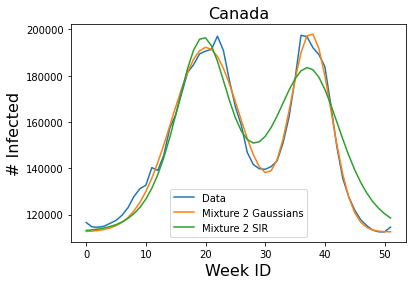

In [11]:
T = len(norm_I)

y_hat_Gaussian = mixture_exponentials(params_gaussian, T) + bias
y_hat_SIR = mixture_SIR(params_SIR, T) + bias

plt.figure()
plt.plot(data)
plt.plot(y_hat_Gaussian)
plt.plot(y_hat_SIR)
plt.legend(['Data', 'Mixture 2 Gaussians', 'Mixture 2 SIR'])
plt.xlabel('Week ID', fontsize=16)
plt.ylabel('# Infected', fontsize=16)
plt.title(country_name, fontsize=16)
plt.show()